## EDUNET FOUNDATION - Class Practice Exercise Notebook

### LAB 22 - Implementing Support Vector Machine Concepts in Python

### Basics of Support Vector Machine

Support Vector Machine or SVM is a supervised and linear Machine Learning algorithm most commonly used for solving classification problems and is also referred to as Support Vector Classification. There is also a subset of SVM called SVR which stands for Support Vector Regression which uses the same principles to solve regression problems. SVM also supports the kernel method also called the kernel SVM which allows us to tackle non-linearity.

#### How SVM Works?

Here, we have two points in two-dimensional space, we have two columns x1 and x2. And we have some observations such as red and green, which are already classified. This is linearly separable data.
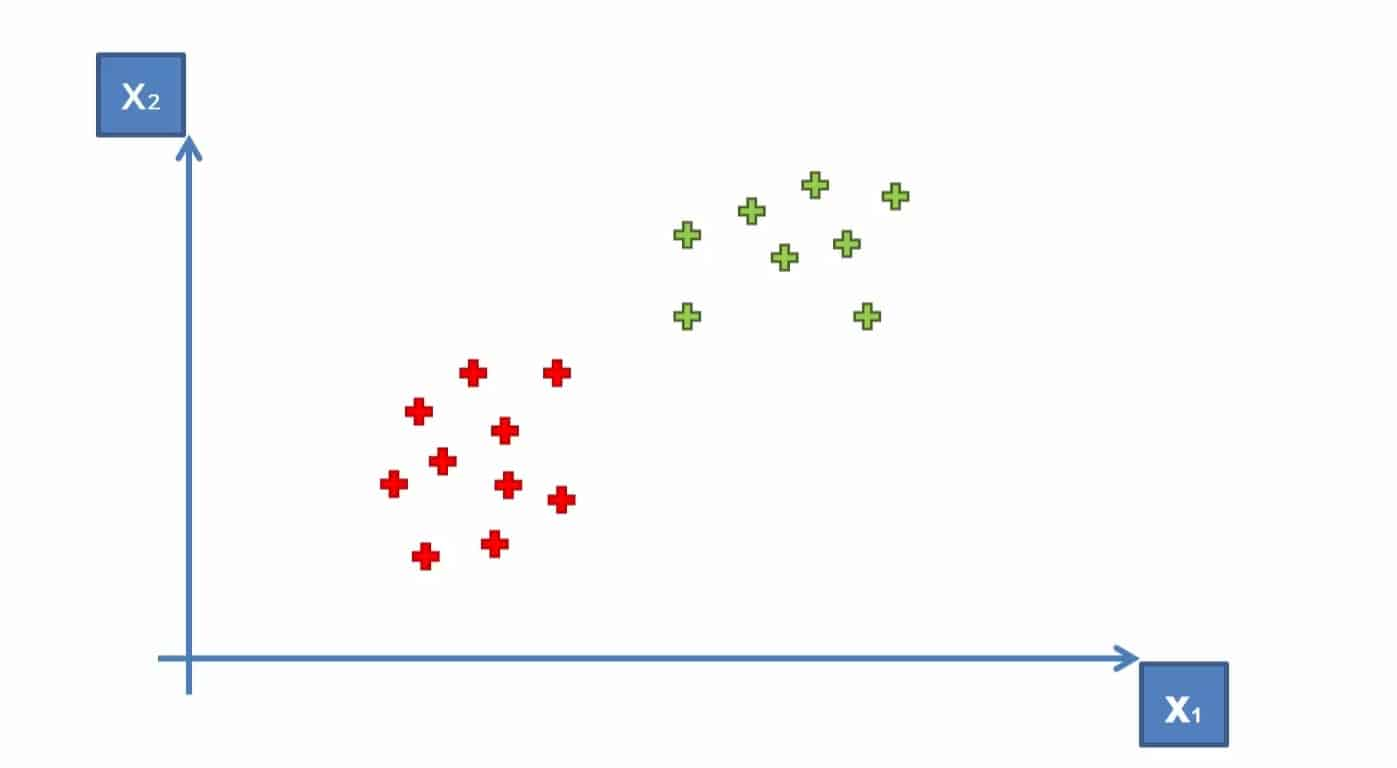

But, now how do we derive a line that separates these points? This means a separation or decision boundary is very important for us when we add new points.

So to classify new points, we need to create a boundary between two categories, and when in the future we will add new points and we want to classify them, then we know where they belong. Either in a Green Area or Red Area.

#### So how can we separate these points?

One way is to draw a vertical line between two areas, so anything on the right is Red and anything on the left is Green. Something like that-
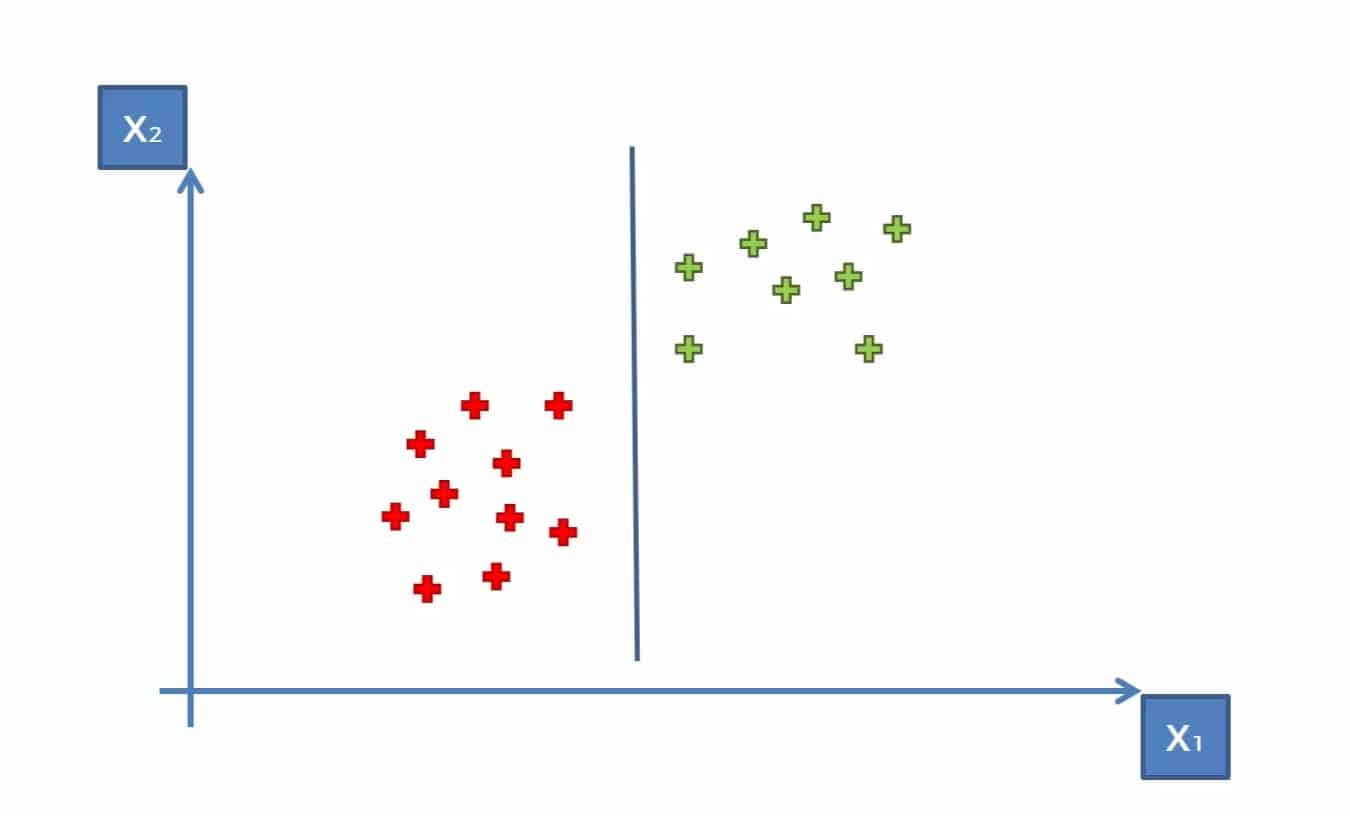

However, there is one more way, draw a horizontal line or diagonal line. You can create multiple diagonal lines, which achieve similar results to separate our points into two classes.

But our main task is to find the optimal line or best decision boundary. And for this SVM is used. SVM finds the best decision boundary, which helps us to separate points into different spaces.

SVM finds the best or optimal line through the maximum margin, which means it has max distance and equidistance from both classes or spaces. The sum of these two classes has to be maximized to make this line the maximum margin.
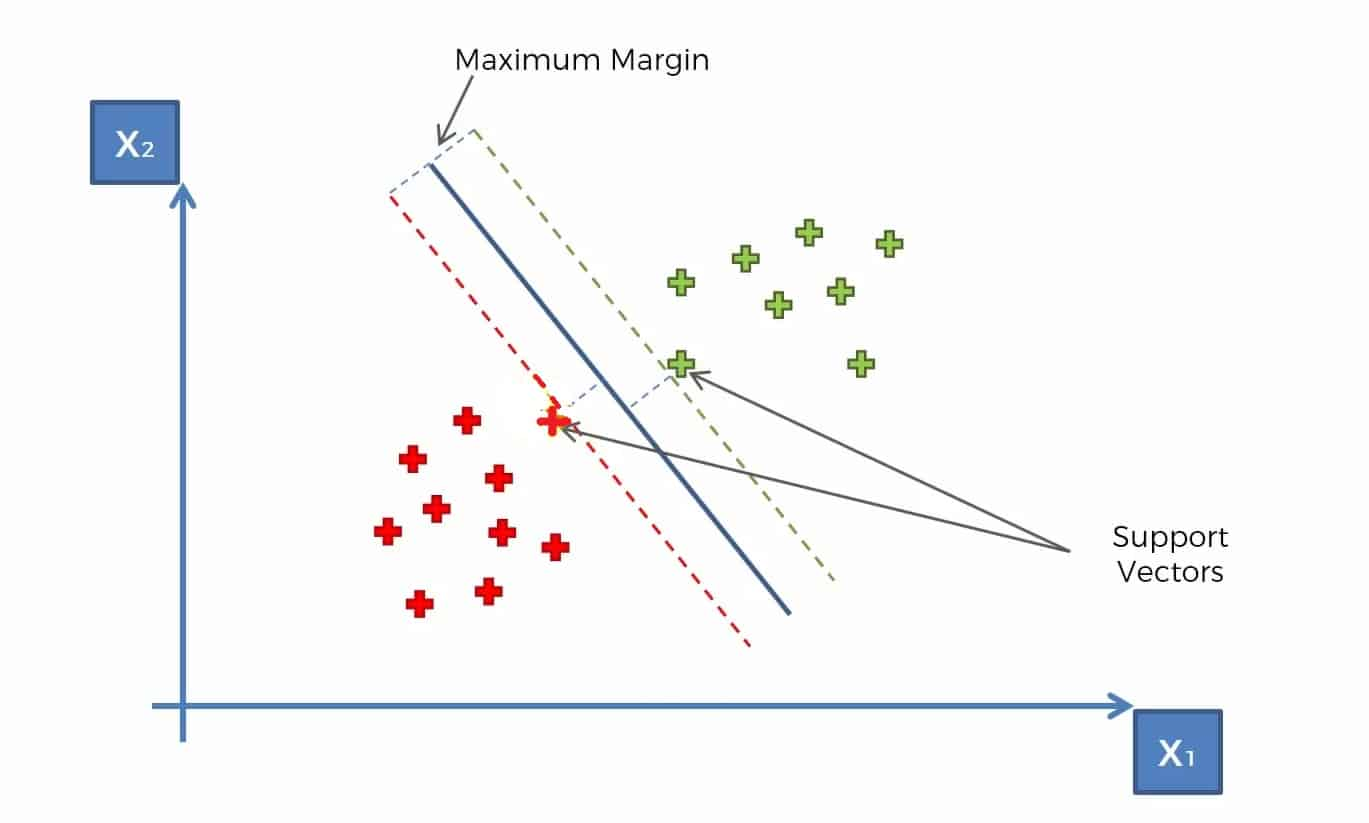

These, two vectors are support vectors. In SVM, only support vectors are contributing. That’s why these points or vectors are known as support vectors. Due to support vectors, this algorithm is called a Support Vector Algorithm(SVM).

In the picture, the line in the middle is a maximum margin hyperplane or classifier. In a two-dimensional plane, it looks like a line, but in a multi-dimensional, it is a hyperplane. That’s how SVM works.

Now let’s move to the SVM Implementation in Python From Scratch.
Link for dataset: https://drive.google.com/file/d/1RgB7Idap8mcNjZKBka-lkj3lahOD0ycn/view?usp=drive_link

#### 1. Import the Libraries-

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#### 2. Load the Dataset

In [6]:
dataset = pd.read_csv('Social_Network_Ads.csv')

So, when you load the dataset after running this line of code, you will get your data something like this-

In [7]:
dataset

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


#### 3. Split Dataset into X and Y

In [8]:
X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, 4].values

**Independent Variables (X)-**

In [10]:
X

array([[    19,  19000],
       [    35,  20000],
       [    26,  43000],
       [    27,  57000],
       [    19,  76000],
       [    27,  58000],
       [    27,  84000],
       [    32, 150000],
       [    25,  33000],
       [    35,  65000],
       [    26,  80000],
       [    26,  52000],
       [    20,  86000],
       [    32,  18000],
       [    18,  82000],
       [    29,  80000],
       [    47,  25000],
       [    45,  26000],
       [    46,  28000],
       [    48,  29000],
       [    45,  22000],
       [    47,  49000],
       [    48,  41000],
       [    45,  22000],
       [    46,  23000],
       [    47,  20000],
       [    49,  28000],
       [    47,  30000],
       [    29,  43000],
       [    31,  18000],
       [    31,  74000],
       [    27, 137000],
       [    21,  16000],
       [    28,  44000],
       [    27,  90000],
       [    35,  27000],
       [    33,  28000],
       [    30,  49000],
       [    26,  72000],
       [    27,  31000],


**Dependent Variable(Y)–**

In [12]:
y

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,

Now we have divided our dataset into X and Y. So the next step is-

#### 4. Split the X and Y Dataset into the Training set and Test set

For building a machine learning model, we need to train our model on the training set. And for checking the performance of our model, we use a Test set. That’s why we have to split the X and Y datasets into the Training set and Test set.

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

While splitting into training and test set, you have to remember that, 80%-90% of your data should be in the training tests. And that’s why I write test_size = 0.25.

Now we have split our dataset into X_train, X_test, y-train, and y_test. The next step is-

#### 5. Perform Feature Scaling

As you can see in the dataset, all values are not in the same range. And that requires a lot of time for calculation. So to overcome this problem, we perform feature scaling.

Feature scaling helps us to normalize the data within a particular range.

In [14]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

After performing feature scaling, all values are normalized and looks something like this-

In [15]:
X_train


array([[ 0.58164944, -0.88670699],
       [-0.60673761,  1.46173768],
       [-0.01254409, -0.5677824 ],
       [-0.60673761,  1.89663484],
       [ 1.37390747, -1.40858358],
       [ 1.47293972,  0.99784738],
       [ 0.08648817, -0.79972756],
       [-0.01254409, -0.24885782],
       [-0.21060859, -0.5677824 ],
       [-0.21060859, -0.19087153],
       [-0.30964085, -1.29261101],
       [-0.30964085, -0.5677824 ],
       [ 0.38358493,  0.09905991],
       [ 0.8787462 , -0.59677555],
       [ 2.06713324, -1.17663843],
       [ 1.07681071, -0.13288524],
       [ 0.68068169,  1.78066227],
       [-0.70576986,  0.56295021],
       [ 0.77971394,  0.35999821],
       [ 0.8787462 , -0.53878926],
       [-1.20093113, -1.58254245],
       [ 2.1661655 ,  0.93986109],
       [-0.01254409,  1.22979253],
       [ 0.18552042,  1.08482681],
       [ 0.38358493, -0.48080297],
       [-0.30964085, -0.30684411],
       [ 0.97777845, -0.8287207 ],
       [ 0.97777845,  1.8676417 ],
       [-0.01254409,

Now, we are done with the data preprocessing steps. It’s time to fit SVM into the training set.

#### 5. Fit SVM to the Training set

In [16]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)

SVC(random_state=0)

This SVC class allows us to build a kernel SVM model (linear as well as non-linear), The default value of the kernel is ‘rbf’. Why ‘rbf’, because it is nonlinear and gives better results as compared to linear.

The classifier.fit(X_train, y_train) fits the SVM algorithm to the training set- X_train and y_train.

Now, all done. It’s time to predict the Test set. So the next step is-

#### 6. Predict the Test Set Results

In [17]:
y_pred = classifier.predict(X_test)

When you run this line of code, you will get y_pred, something like this-

In [18]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1], dtype=int64)

But can you explain by looking at these predicted values, how many values are predicted right, and how many values are predicted wrong?

For a small dataset, you can. But when we have a large dataset, it’s quite impossible. And that’s why we use a confusion matrix, to clear our confusion.

So, the next step is-

#### 7. Make the Confusion Matrix

In [19]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test,y_pred)

[[64  4]
 [ 3 29]]


0.93

And we got 93% accuracy.

Now it’s time to showcase our findings in a visual form. So the next step is-

#### 8. Visualise the Test set results

C:\Users\PRS\AppData\Local\Temp\ipykernel_11384\2113774946.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


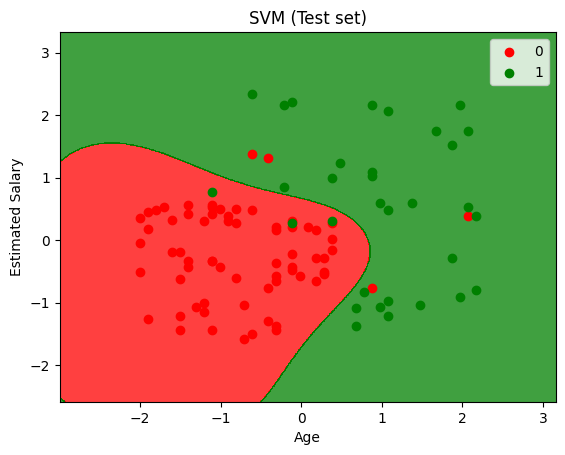

In [21]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

As you can see in the image, there are a total of 7 incorrect predictions. There are 3 green(Yes) predictions that were predicted as Red(No) and 4 Red(No) predictions that were predicted as Green(Yes).

But overall we got 93% accuracy and that’s great.